In [6]:
import geopandas as gpd
import openeo

In [7]:
gdf = gpd.read_file(r'C:\Users\holemant\OneDrive - VITO\Documents\Engineering\OpenEO\Issue81\To Push\openeo-community-examples\python\RankComposites\test_area.geojson')
gdf = gdf.to_crs(epsg=4326)
area = eval(gdf.to_json())

In [8]:
c=openeo.connect("openeo.dataspace.copernicus.eu").authenticate_oidc()

Authenticated using refresh token.


In [9]:
temporal_extent = ["2022-07-01", "2022-07-31"]
max_cloud_cover = -5

In [ ]:
bap_composite = c.datacube_from_process(
    process_id='bap_composite',
    namespace='https://raw.githubusercontent.com/ESA-APEx/apex_algorithms/refs/heads/Issue81_bapCompositeUpdate/algorithm_catalog/vito/bap_composite/openeo_udp/bap_composite.json',
    #namespace='https://raw.githubusercontent.com/ESA-APEx/apex_algorithms/refs/heads/main/algorithm_catalog/vito/bap_composite/openeo_udp/bap_composite.json',
    geometry=area,
    temporal_extent=temporal_extent,
    max_cloud_cover=max_cloud_cover,
    bands=['B04', 'B03', 'B02']
)

job = bap_composite.execute_batch(
    title="BAP Composite",
    out_format="netcdf"
)
results = job.get_results()
results.download_files('./results/')

0:00:00 Job 'j-2510011253474fdc9708ec23673f97f5': send 'start'
0:00:16 Job 'j-2510011253474fdc9708ec23673f97f5': created (progress 0%)
0:00:21 Job 'j-2510011253474fdc9708ec23673f97f5': created (progress 0%)
0:00:27 Job 'j-2510011253474fdc9708ec23673f97f5': running (progress N/A)
0:00:35 Job 'j-2510011253474fdc9708ec23673f97f5': running (progress N/A)
0:00:45 Job 'j-2510011253474fdc9708ec23673f97f5': running (progress N/A)
0:00:57 Job 'j-2510011253474fdc9708ec23673f97f5': running (progress N/A)
0:01:13 Job 'j-2510011253474fdc9708ec23673f97f5': running (progress N/A)
0:01:32 Job 'j-2510011253474fdc9708ec23673f97f5': running (progress N/A)
0:01:56 Job 'j-2510011253474fdc9708ec23673f97f5': running (progress N/A)
0:02:26 Job 'j-2510011253474fdc9708ec23673f97f5': running (progress N/A)
0:03:03 Job 'j-2510011253474fdc9708ec23673f97f5': finished (progress 100%)


[WindowsPath('results/openEO.nc'), WindowsPath('results/job-results.json')]

In [11]:
import xarray as xr
composite_ds = xr.open_dataset(r'C:\Users\holemant\OneDrive - VITO\Documents\Engineering\OpenEO\results\openEO.nc')

In [12]:
import numpy as np
rgb_array=composite_ds.to_array(dim="bands").sel(bands=["B04","B03","B02"]).astype(np.float32)/10000

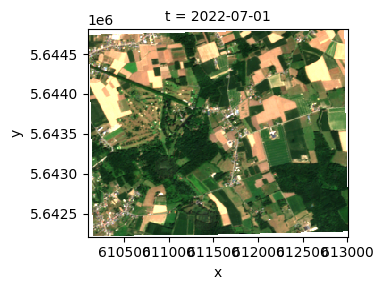

In [13]:
xr.plot.imshow(rgb_array,vmin=0,vmax=0.18,rgb="bands",col='t',col_wrap=2)